In [ ]:
from collections import Counter
from abc import ABC, abstractclassmethod, abstractmethod
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, metrics
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option("display.max_rows",4999)

In [ ]:


class FederalRates(ABC):
    
    def __init__(self, fundRate, inflation):
        try: 
            self.fundRate = fundRate
            self.inflation = inflation
            super(FederalRates, self).__init__()
        except AttributeError as e:
            print(e)
            
    @abstractmethod
    def predict(self):
        return self.__init__() 
    
    @abstractmethod
    def testValues(self):
        return self.__init__() 

    @classmethod
    def readData(cls, path):
        rawData = pd.read_csv(path)
        return (rawData)


        


# Testing Our Dataset with Auto regressive Model #

### What is an ARIMA model? ###

Arima model is a class of statistical models for analyzing and forecasting time series since our variable is depending on the time.

It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts.

**ARIMA** is an acronym that stands for **AutoRegressive Integrated Moving Average**. It is a generalization of the simpler **AutoRegressive Moving Average** and adds the notion of integration.

1) **AR**: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.

2) **I**: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

3) **MA**: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

### Describing our equation ###

our main purpose is to predict from ŷ to y value. for this we need to create matrix design which part of the geometric series. 

**ŷt   =   μ + ϕ1 yt-1 +…+ ϕp yt-p - θ1et-1 -…- θqet-q**

for this calculation we need to understand the behavior of the partial derivates, newtons method and geometric series.


To identify the appropriate ARIMA model for Y, you begin by determining the order of differencing (d) needing to stationarize the series and remove the gross features of seasonality, perhaps in conjunction with a variance-stabilizing transformation such as logging or deflating. 

If you stop at this point and predict that the differenced series is constant, you have merely fitted a random walk or random trend model.  

However, the stationarized series may still have autocorrelated errors, suggesting that some number of AR terms (p ≥ 1) and/or some number MA terms (q ≥ 1) are also needed in the forecasting equation.


In [111]:

class TestInterestRate(FederalRates):
    
    def filtered(self):
        rawInterestRate = self.fundRate["DATE"] > "2018-01-01"
        return self.fundRate[rawInterestRate].set_index("DATE")
    
    def predict(self):
        interestRate = self.filtered()["FF"]    
        freqTable = dict(Counter(interestRate))
        return interestRate .describe()
        
    def StartARIMAForecasting(self, Actual, P, D, Q):
        """
            P — Auto regressive feature of the model
            D — Differencing order
            Q — Moving average feature of the model

        """
        model = ARIMA(Actual, order=(P, D, Q))
        model_fit = model.fit(disp=0)
        prediction = model_fit.forecast()[0]
        return prediction
    
    def testValues(self):
        values = self.filtered()["FF"]
        #predict next value
        predicted = self.StartARIMAForecasting(values, 3,1,0)

        #Use 80% of data as training, rest 20% to Test model
        NumberOfElements = len(values)
        TrainingSize = int(NumberOfElements * 0.7)
        TrainingData = values[0:TrainingSize]
        TestData = values[TrainingSize:NumberOfElements]

        #new arrays to store actual and predictions
        Actual = [x for x in TrainingData]
        Predictions = list()


        #in a for loop, predict values using ARIMA model
        for timepoint in range(len(TestData)):
            ActualValue =  TestData[timepoint]
            #forcast value
            Prediction = self.StartARIMAForecasting(Actual, 2,1,0)# second order auto regression    
            print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
            #add it in the list
            Predictions.append(Prediction)
            Actual.append(ActualValue)

        #Print MSE to see how good the model is
        Error = mean_squared_error(TestData, Predictions)
        print('\n Test Mean Squared Error (smaller the better fit): %.3f' % Error)
        # plot
        plt.subplots(figsize=(19, 8))
        plt.plot(TestData)
        plt.plot(Predictions, color='red')
        plt.show()
                


### Executing our dataset ###

/Users/sadikerisen/opt/anaconda3/envs/forecastingInterestRate/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % freq, ValueWarning)
/Users/sadikerisen/opt/anaconda3/envs/forecastingInterestRate/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % freq, ValueWarning)


Actual=2.440000, Predicted=2.456341
Actual=2.400000, Predicted=2.455013
Actual=2.380000, Predicted=2.418851
Actual=2.390000, Predicted=2.400466
Actual=2.380000, Predicted=2.407269
Actual=2.390000, Predicted=2.395024
Actual=2.370000, Predicted=2.405853
Actual=2.370000, Predicted=2.384787
Actual=2.380000, Predicted=2.386174
Actual=2.400000, Predicted=2.394200
Actual=2.410000, Predicted=2.413183
Actual=2.390000, Predicted=2.422703
Actual=2.410000, Predicted=2.404040
Actual=2.400000, Predicted=2.425146
Actual=2.130000, Predicted=2.412767
Actual=2.120000, Predicted=2.142436
Actual=2.130000, Predicted=2.151301
Actual=2.120000, Predicted=2.140100
Actual=2.130000, Predicted=2.128316
Actual=2.130000, Predicted=2.139862
Actual=2.190000, Predicted=2.138398
Actual=1.900000, Predicted=2.200512
Actual=1.850000, Predicted=1.914321
Actual=1.820000, Predicted=1.871876
Actual=1.840000, Predicted=1.825248
Actual=1.850000, Predicted=1.846053
Actual=1.830000, Predicted=1.854880
Actual=1.570000, Predicted=1

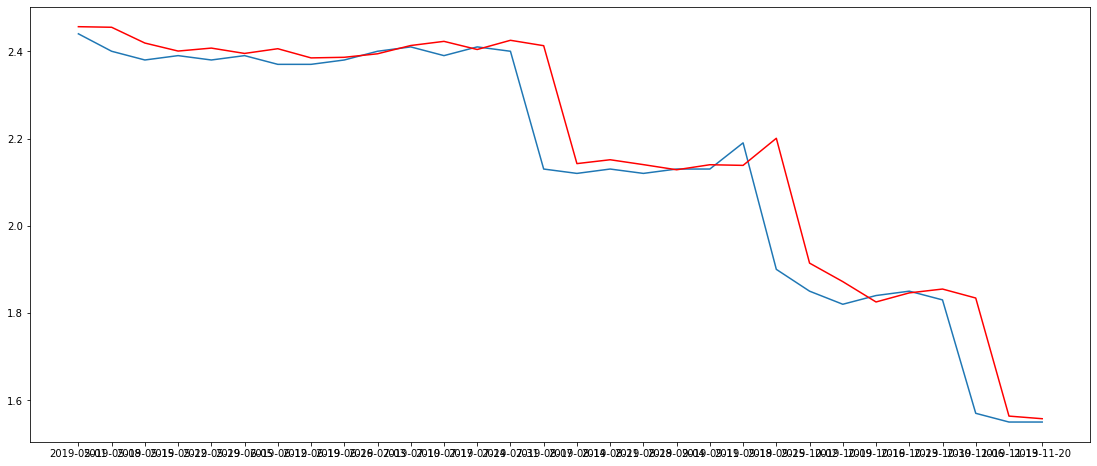

In [112]:
def test(rawInterestRateData, rawInflationRateData):
    testInterestRate = TestInterestRate(FederalRates.readData(rawInterestRateData), FederalRates.readData(rawInflationRateData))
    return testInterestRate.testValues()

if __name__ == "__main__":
    test("./FF.csv", "./index.csv")

In [110]:
def describes(rawInterestRateData, rawInflationRateData):
    testInterestRate = TestInterestRate(FederalRates.readData(rawInterestRateData), FederalRates.readData(rawInflationRateData))
    return print(testInterestRate.predict())

if __name__ == "__main__":
    describes("./FF.csv", "./index.csv")

count    568.000000
mean       0.562130
std        0.732962
min        0.050000
25%        0.110000
50%        0.160000
75%        0.660000
max        2.440000
Name: FF, dtype: float64


In [ ]:

class InterestRate(FederalRates):
    
    def filtered(self):
        rawInterestRate = self.fundRate["DATE"] > "2019-05-01"
        return self.fundRate[rawInterestRate].set_index("DATE")
    
    def predict(self):
        interestRate = self.filtered()["FF"]        
        return interestRate.describe()
    
    def testValues(self):
        pass

In [ ]:
def main(rawInterestRateData, rawInflationRateData):
    interestRate = InterestRate(FederalRates.readData(rawInterestRateData), FederalRates.readData(rawInflationRateData))
    return (interestRate.predict())
 
if __name__ == "__main__":
    main("./FF.csv", "./index.csv")